In [1]:
# !pip install pandas
# !pip install numpy
# !pip install missingno 

<div style="color:white; background-color: #AEC6CF; padding: 20px; border-radius:8px; font-size:26px"><b style="font-weight: 700;"><center>Predicting Hotel Cancellations</center></b></div>

<div style="color:white; background-color: #AEC6CF; padding: 20px; border-radius:8px; font-size:20px"><b style="font-weight: 700;"><center> Exploratory Data Analysis</center></b></div> 

This project is part of a competition released in DataCamp (https://app.datacamp.com/learn/competitions/predict-hotel-cancellation)

The dataset was collected from Kaggle (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) and modified accordingly

<div style="background-color:  #eddcd2; padding: 10px;">
    
### The Data

</div>

The bookings data is storaged in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were not canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

<div style="background-color:  #eddcd2; padding: 10px;">
    
### Classification Problem

**Target**: booking_status
    
</div>

In [2]:
# Import the necessary libraries 

# EDA pkgs
import pandas as pd                         # for data manipulation and analysis 
import numpy as np                          # for working with arrays and matrices
pd.set_option('display.max_rows', 500)      # Set max number of rows displayed
pd.set_option('display.max_columns', 500)   # Set max number of columns displayed
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt             # for creating plots
%matplotlib inline

import missingno as msno
import seaborn as sns                       # for complex visualizations that can't be achieved by plt
sns.set(style="darkgrid");                  # Sets the default parameters for seaborn


# colors used in text boxes
# #d6eadf: green
# #AEC6CF: blue-gray

In [3]:
# load the data
df = pd.read_csv("D:\git\Playground\Projects\Hotel Cancellations\hotel_bookings.csv", na_values=np.nan)
display(df.head(5))

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [4]:
# Columns of dataset

df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status'], dtype='object')

In [5]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

<div style="background-color:  #fbe3e8; padding: 10px;">
    
- The data contains 36275 entries (rows) and 19 features (columns)
 
- **required_car_parking_space** and **repeated_guest** must have object type
    
- The data contains missing values that I need to analize 

</div>


<div style="background-color:  #eddcd2; padding: 10px;"> 
    
### Wrangling data 

<div>

In [6]:
# Change type of required_car_parking_space and repeated_guest

df['required_car_parking_space'] = df['required_car_parking_space'].astype('object')
df['repeated_guest'] = df['repeated_guest'].astype('object')

df.dtypes

Booking_ID                               object
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                        object
required_car_parking_space               object
room_type_reserved                       object
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
market_segment_type                      object
repeated_guest                           object
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
booking_status                           object
dtype: object

In [7]:
# Correcting the wrong values in dates

# Unique values for the arrival_year
print(df['arrival_year'].value_counts())

# Checking for the maximum day per month in the data
print(df.groupby('arrival_month')['arrival_date'].agg('max'))

# Since neither 2017 nor 2018 are leap year, february has 28 days. 
df.loc[(df['arrival_month'] == 2) & (df['arrival_date'] >= 29), ['arrival_month','arrival_date']] = [3,1]

print(df.groupby('arrival_month')['arrival_date'].agg('max'))

2018.0    29451
2017.0     6446
Name: arrival_year, dtype: int64
arrival_month
1.0     31.0
2.0     29.0
3.0     31.0
4.0     30.0
5.0     31.0
6.0     30.0
7.0     31.0
8.0     31.0
9.0     30.0
10.0    31.0
11.0    30.0
12.0    31.0
Name: arrival_date, dtype: float64
arrival_month
1.0     31.0
2.0     28.0
3.0     31.0
4.0     30.0
5.0     31.0
6.0     30.0
7.0     31.0
8.0     31.0
9.0     30.0
10.0    31.0
11.0    30.0
12.0    31.0
Name: arrival_date, dtype: float64


In [25]:
# Replace categories in 'required_car_parking_space' and 'repeated_guest' to avoid confusions

# 'required_car_parking_space'
df['required_car_parking_space'].replace(0, 'No', inplace = True)
df['required_car_parking_space'].replace(1, 'Yes', inplace = True)

# 'repeated_guest'
df['repeated_guest'].replace(0, 'No', inplace = True)
df['repeated_guest'].replace(1, 'Yes', inplace = True)

<div style="background-color:  #eddcd2; padding: 10px;">   

### Duplicates 

</div>


In [8]:
print('Number of duplicates in the dataset: ', df.duplicated().sum())

Number of duplicates in the dataset:  0


<div style="background-color:  #fbe3e8; padding: 10px;">
    
I remove **Booking_ID** since it is not necessary for the analysis
    
</div>

In [9]:
df.drop('Booking_ID', axis = 1, inplace = True)
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


<div style="background-color:  #eddcd2; padding: 10px;">  

### Missing Values 
   
</div>

In [10]:
# Summary of missing values per features
miss_num = df.isna().sum()

miss_perc = round(miss_num/len(df)*100,1)

df_miss =pd.DataFrame({'No_missing': miss_num,
                       '%_missing': miss_perc})

print('Missing values summary per feature \n')
print('-------------------------------------------------------')
display(df_miss)

Missing values summary per feature 

-------------------------------------------------------


,No_missing,%_missing
no_of_adults,413,1.1
no_of_children,324,0.9
no_of_weekend_nights,367,1.0
no_of_week_nights,807,2.2
type_of_meal_plan,526,1.5
required_car_parking_space,2592,7.1
room_type_reserved,1171,3.2
lead_time,472,1.3
arrival_year,378,1.0
arrival_month,504,1.4


<div style="background-color:  #fbe3e8; padding: 10px;">
    
There are missing values in all features, but the percentage of missing values is very low in all of them.

The features with the largest number of missing values are: **required_car_parking_space**, **room_type_reserved** and **market_segment_type**
    
</div>

<Figure size 1500x900 with 0 Axes>

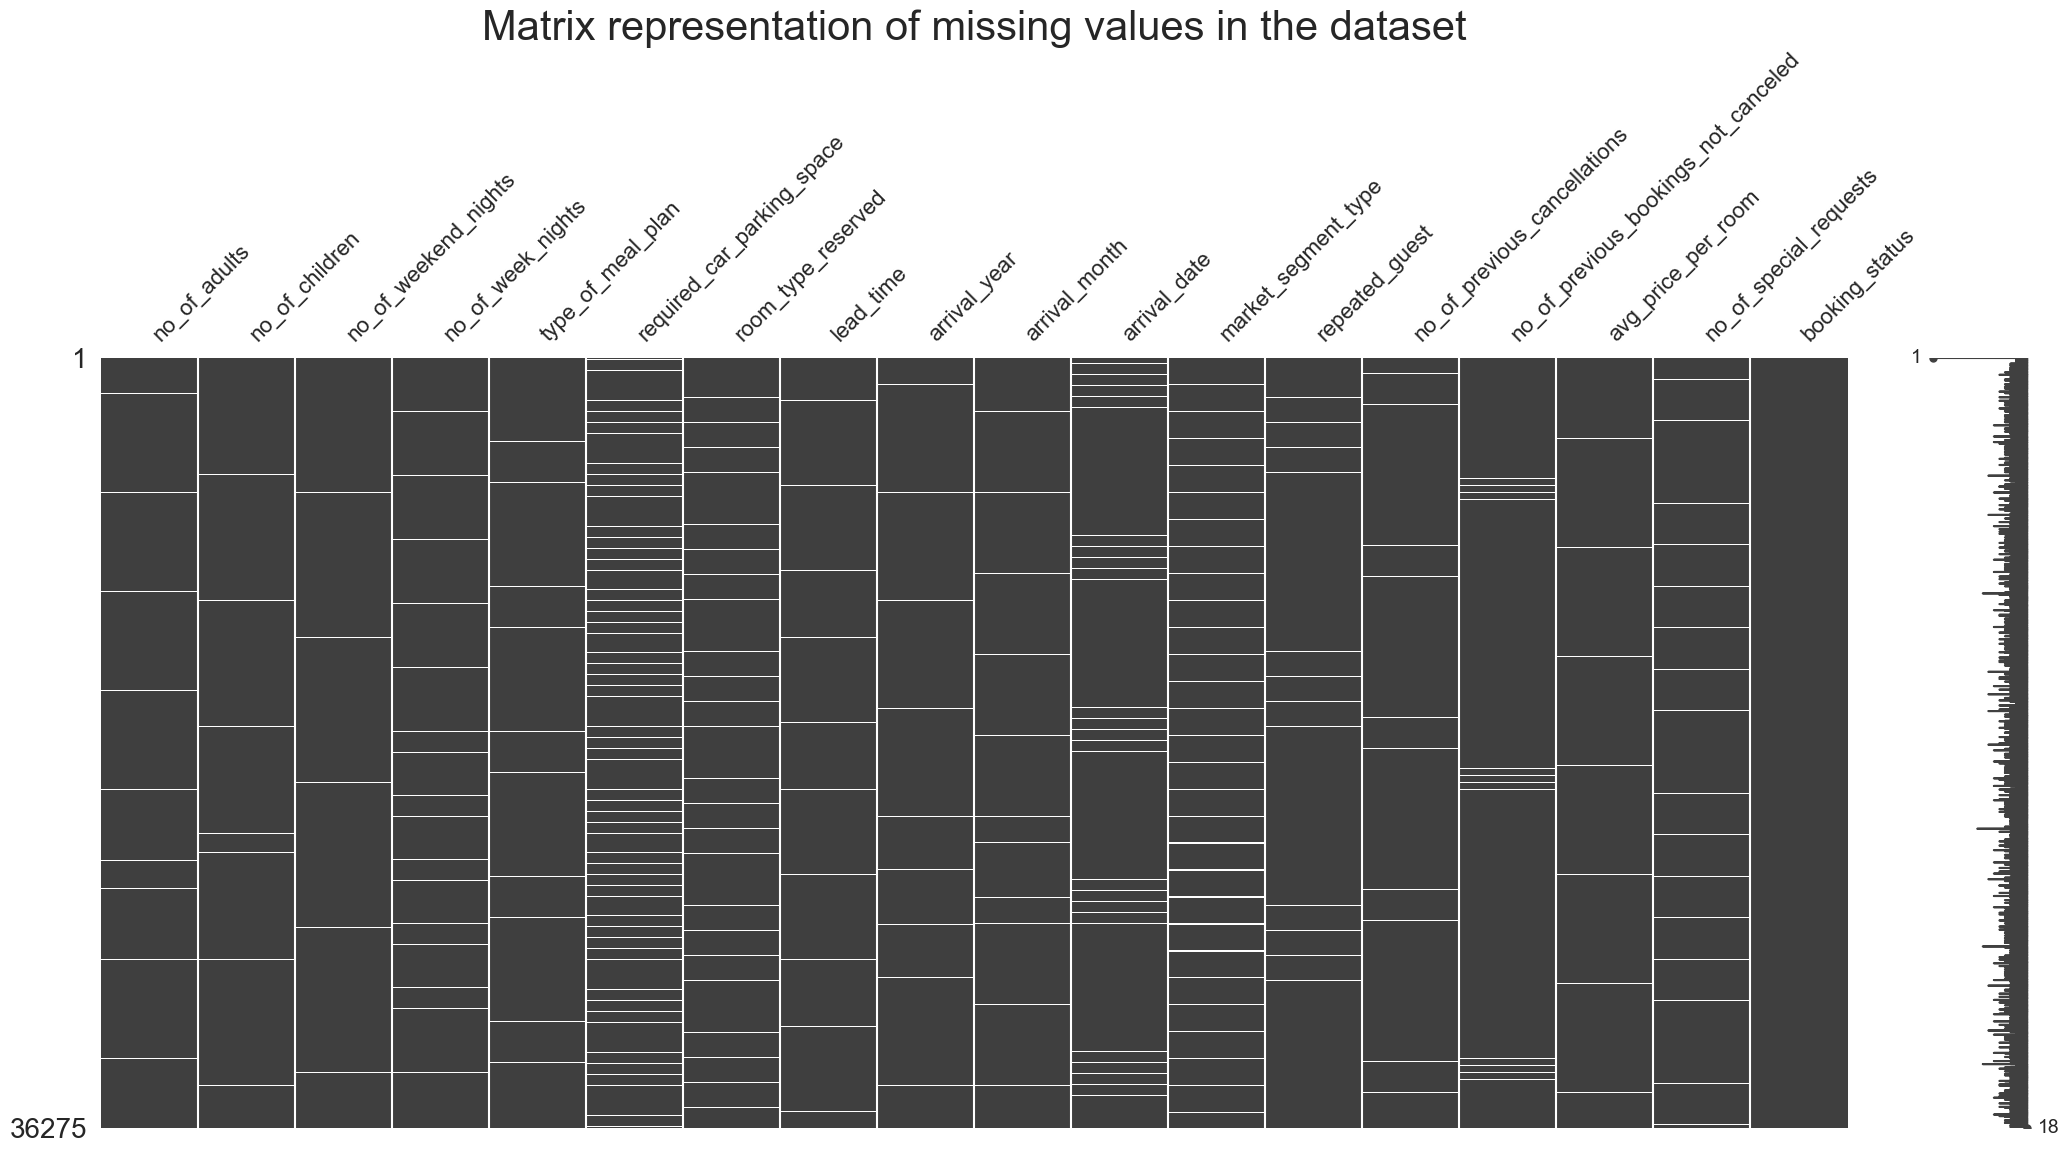

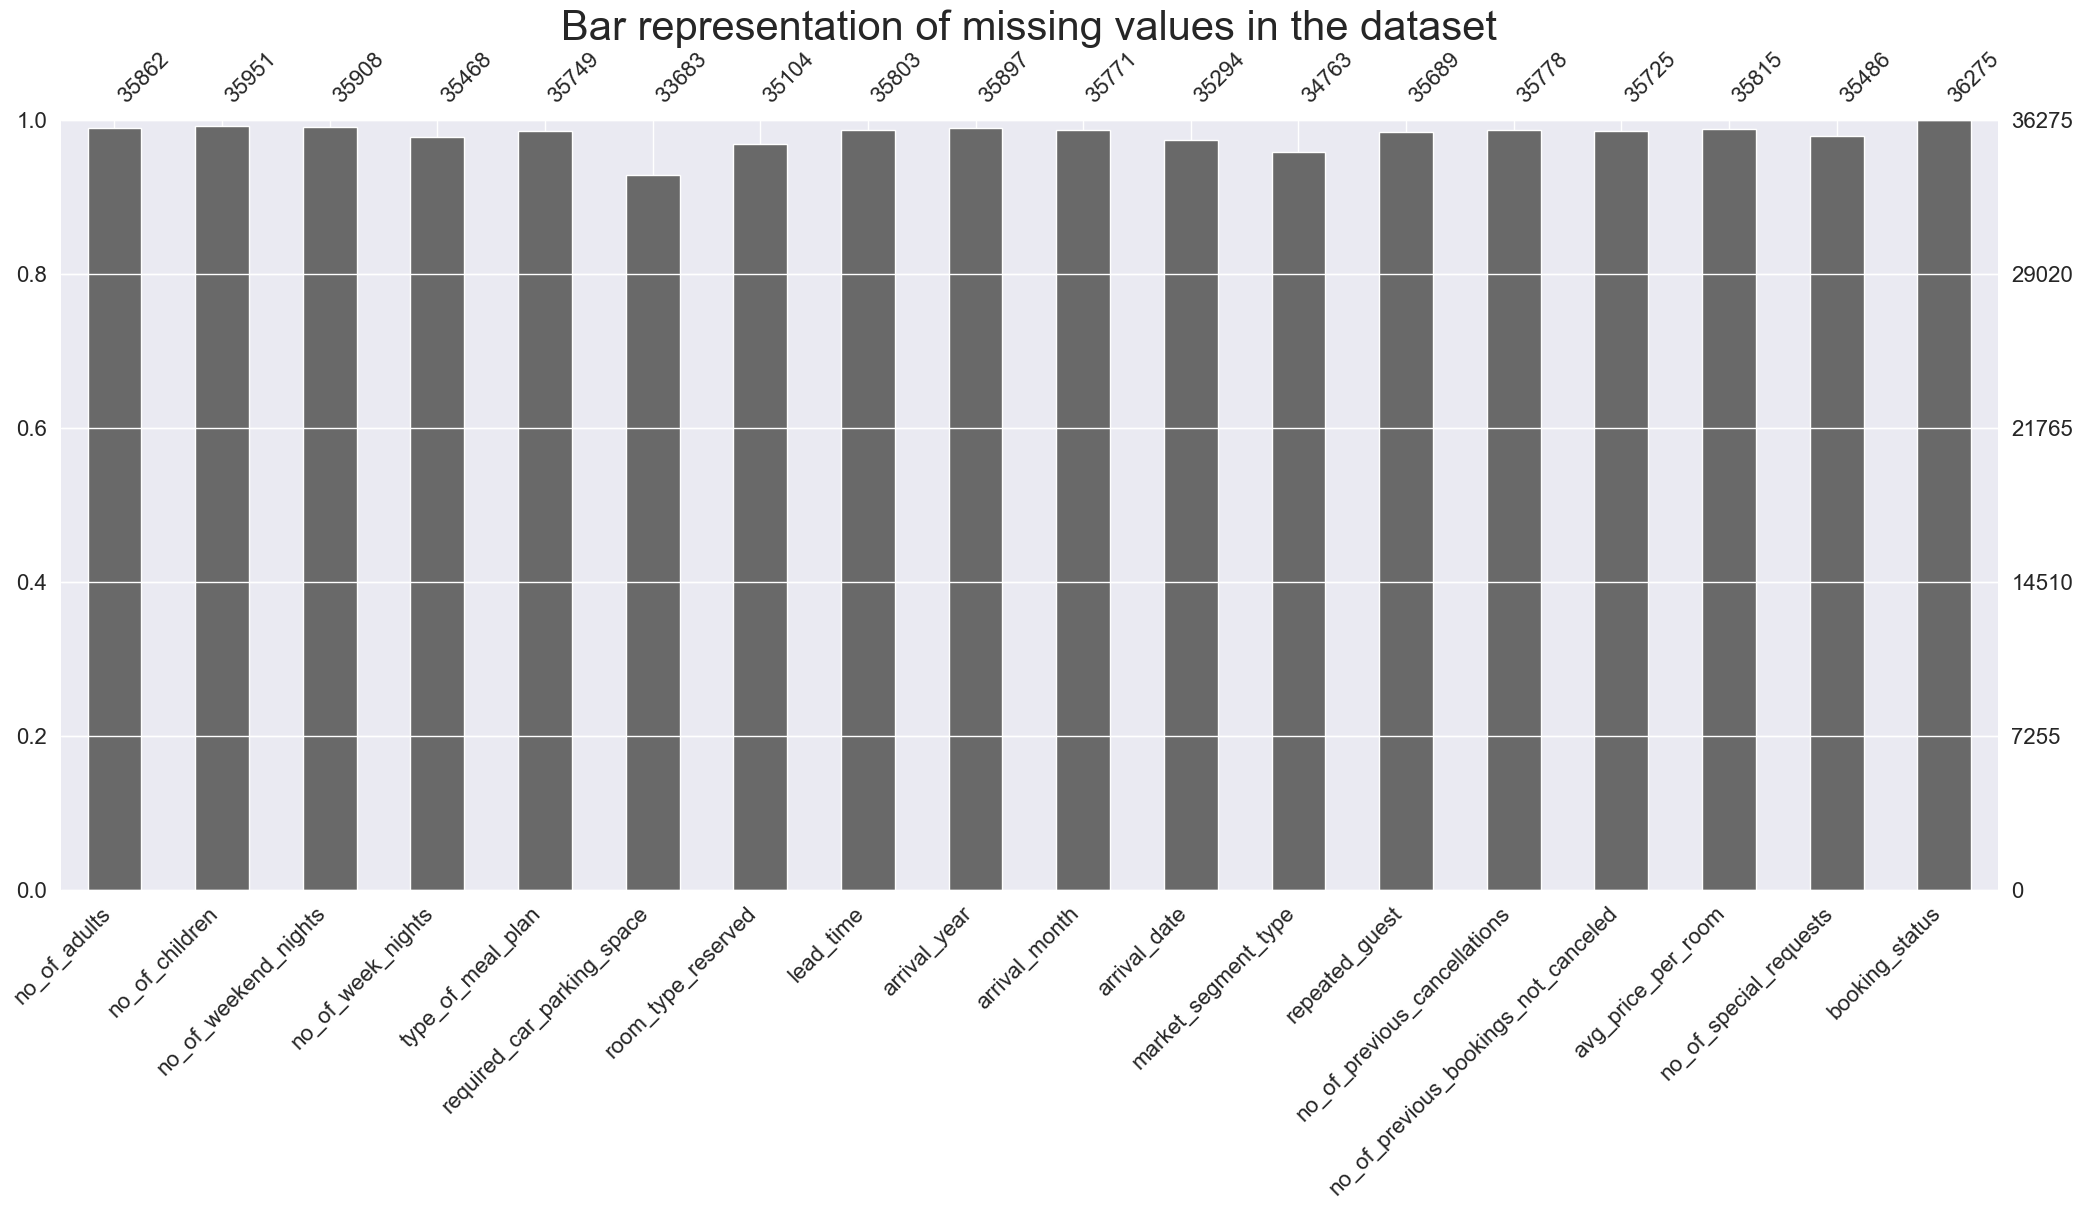

<Figure size 1500x900 with 0 Axes>

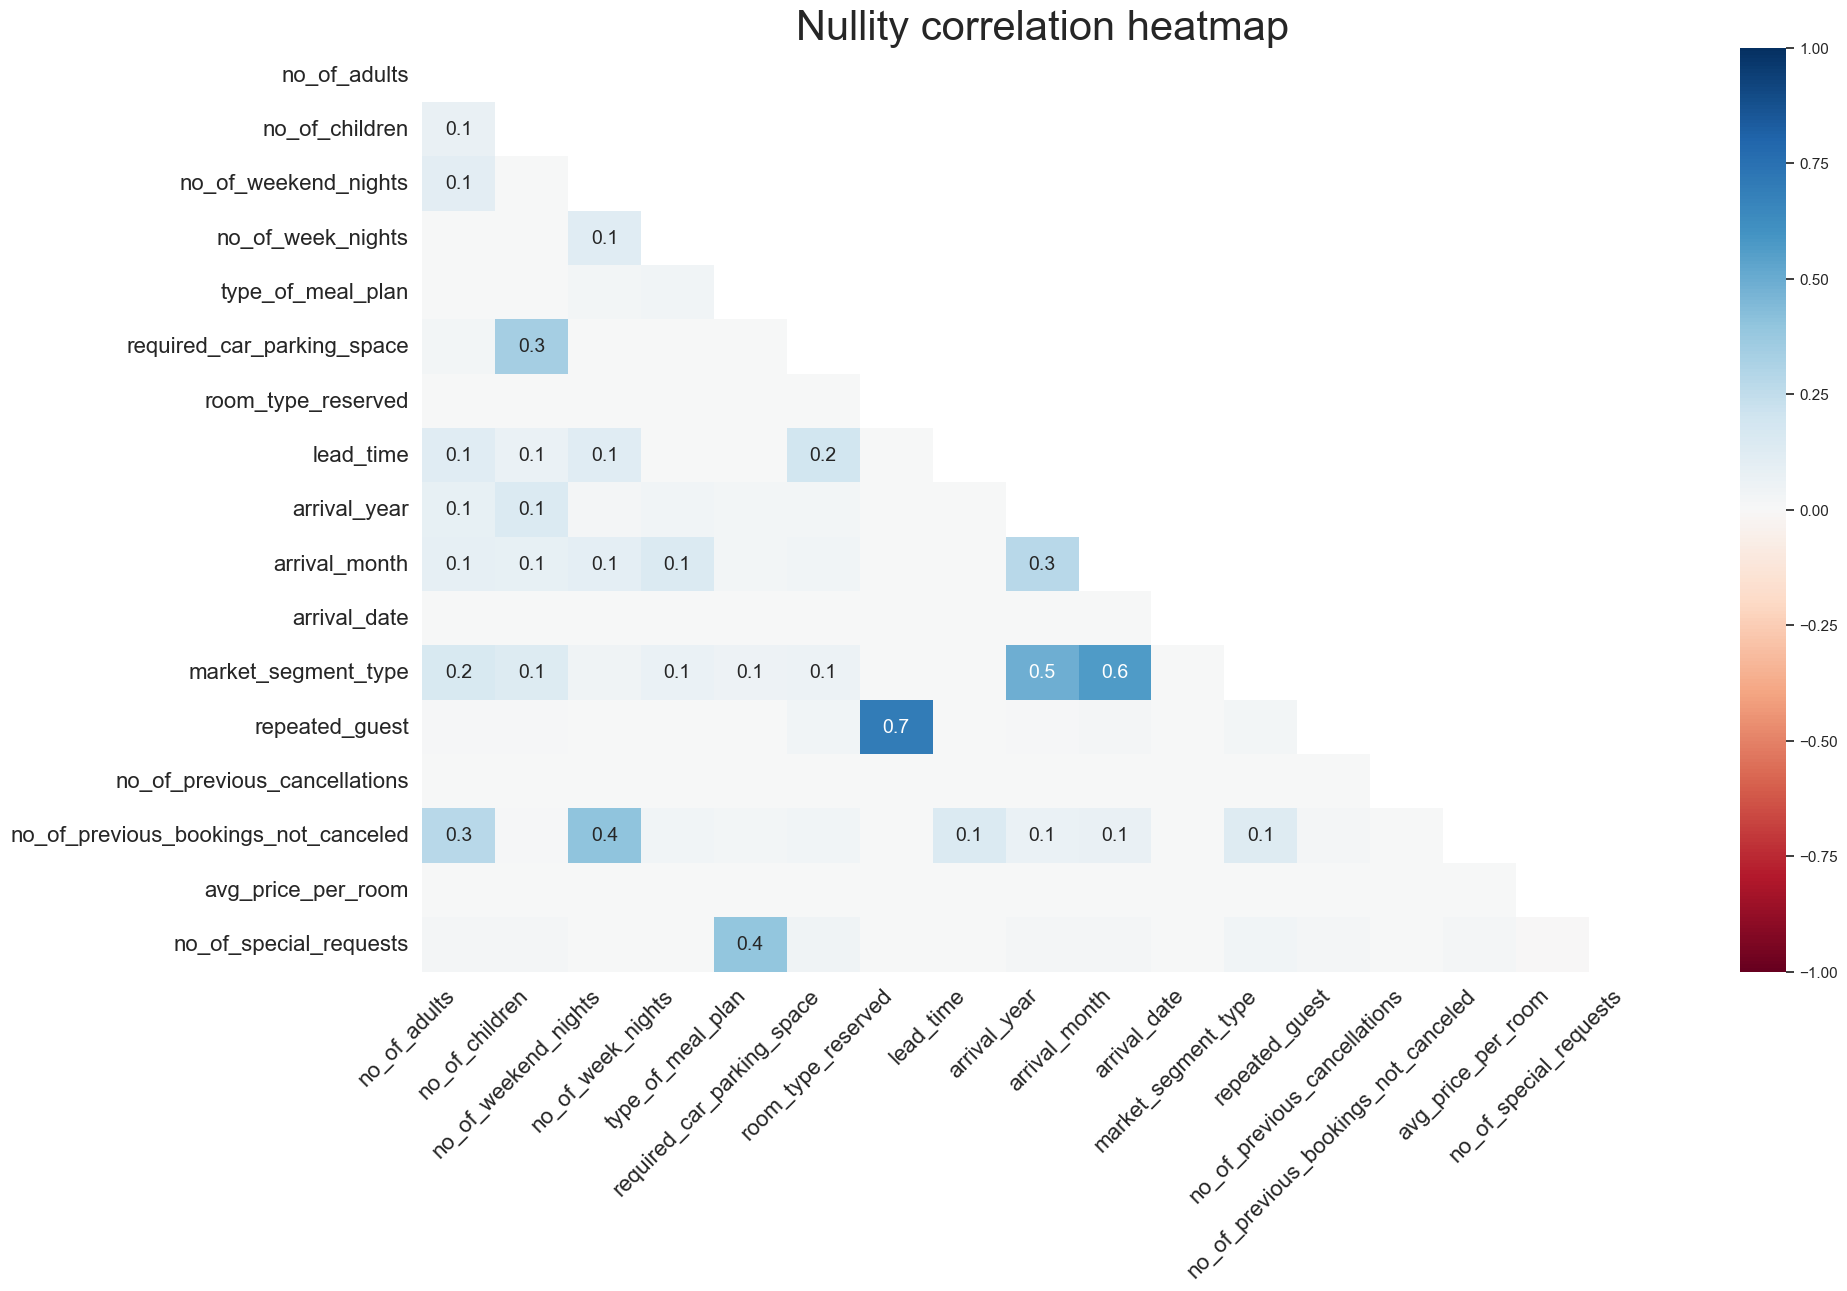

In [11]:
# Visual representation of missing values with missingno

# matrix 
plt.figure(figsize = (15,9)) 
msno.matrix(df)
plt.title('Matrix representation of missing values in the dataset', fontsize = 30)
plt.show();

# bar
plt.figure(figsize = (15,9)) 
msno.bar(df)
plt.title('Bar representation of missing values in the dataset', fontsize = 30)
plt.show();

# heatmap
plt.figure(figsize = (15,9)) 
msno.heatmap(df, labels = True)
plt.title('Nullity correlation heatmap', fontsize = 30);
plt.show();

<div style="background-color:  #fbe3e8; padding: 10px;">
    
- **matrix** 
 
I observ a low amount of missing values for each feature.
    
- **barplot**
    
The high of bars corresponding to the features with missing values are almost the maximum high, which is another confirmation about the small percentage of missing values for all features.
    
- **heatmap**
    
With this plot I identify correlations of the nullity between each of the different features. In other words, I identify if there is a relationship in the presence of null values between each of the features.
    
- [ ] Values close to +1 (-1) indicate that the presence of null values in one feature is correlated (anti-correlated) with the presence of null values in another feature. In other words, when null values are present in one column, there are null (data) values present in the other feature, and viceversa.
 - **repeated_guest** and **room_type_reserved** have a moderated-high nullity correlation. 
    
- [ ] Values close to 0 indicate there is little to no relationship between the presence of null values in one feature compared to another.
    

</div>

<div style="background-color:  #eddcd2; padding: 10px;">  

### Numerical Variables
    
</div>

**Statistical summary**

In [12]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,35862.0,2.0,1.0,0.0,2.0,2.0,2.0,4.0
no_of_children,35951.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,35908.0,1.0,1.0,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,35468.0,2.0,1.0,0.0,1.0,2.0,3.0,17.0
lead_time,35803.0,85.0,86.0,0.0,17.0,57.0,126.0,443.0
arrival_year,35897.0,2018.0,0.0,2017.0,2018.0,2018.0,2018.0,2018.0
arrival_month,35771.0,7.0,3.0,1.0,5.0,8.0,10.0,12.0
arrival_date,35294.0,16.0,9.0,1.0,8.0,16.0,23.0,31.0
no_of_previous_cancellations,35778.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
no_of_previous_bookings_not_canceled,35725.0,0.0,2.0,0.0,0.0,0.0,0.0,58.0


<div style="background-color:  #fbe3e8; padding: 10px;">
    
The numeric variables have different scales.
    
</div>

<div style="background-color:  #c6e2e9; padding: 5px;"> 

**Q1: What is the behavior of the numeric variables excluding arrival dates, 'lead_time' and 'avg_price_per_room'?**
    
</div>

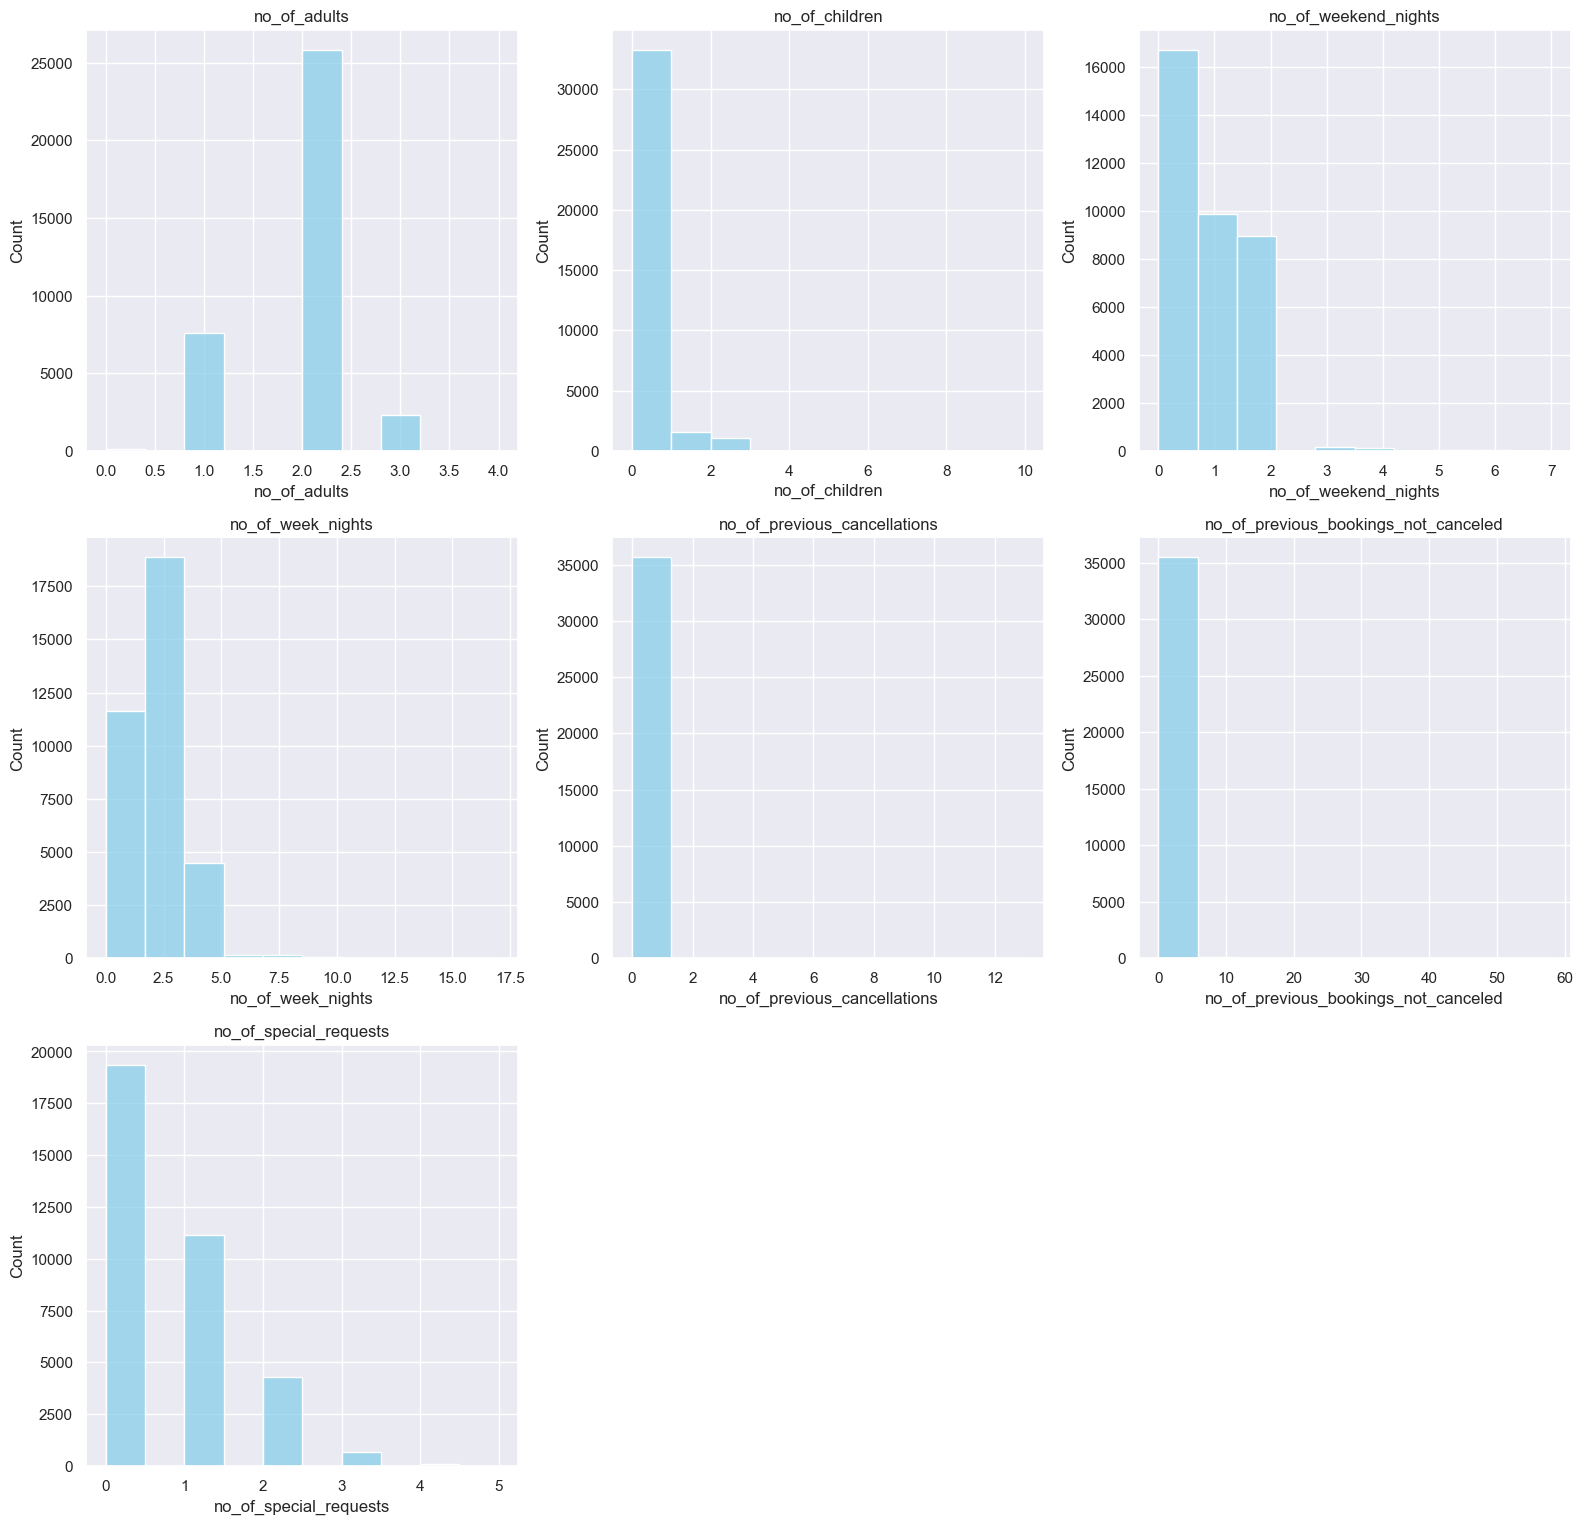

In [31]:
# numerical columns excluding date columns, 'lead_time' and 'avg_price_per_room'
cols_num = [col for col in df.columns if df[col].dtype != 'object' and col not in ['arrival_year','arrival_month','arrival_date','lead_time','avg_price_per_room']]

plt.figure(figsize = (16,20))

for i, col in enumerate(cols_num):
    plt.subplot(4, 3, i+1)
    plt.gca().set_title(col)
    hist = sns.histplot(data = df,
                        x = col,
                        bins = 10,
                        color = 'skyblue',
                        kde = False)
    hist.set_label(col)
    
# plt.legend()
plt.tight_layout()                   # Adjust subplot spacing
plt.show;

<div style="background-color:  #fbe3e8; padding: 10px;">

- **no_of_adults**: Most of reservations contains 2 adults. There are reservations with no adults (maybe possible under hotel restrictions) 
    
- **no_of_children**: Most of reservations have no children.
    
- **no_of_weekend_nights**: Most of reservations are not for weekends nights. Also there is a relative large number of reservations staying 1 or 2 weekend nights.
    
- **no_of_week_nights**: Most of reservations stay for 2 nights in the week. Some reservations stays 5 nights in the week.
    
- **no_of_previous_cancellations**, **no_of_previous_bookings_not_canceled**: The vast majority of reservations have no previous cancellations and no previous bookings not canceled (new guests?) How many of these guests are not 'repeated_guest'
    
- **no_of_special_requests**: Most of reservation have no special requests and a considerable number of reservations have 1 special request.
    
</div>

<div style="background-color:  #c6e2e9; padding: 5px;"> 
    
**Q1: What influence on the booking_status have the numerical variables?**    
</div>

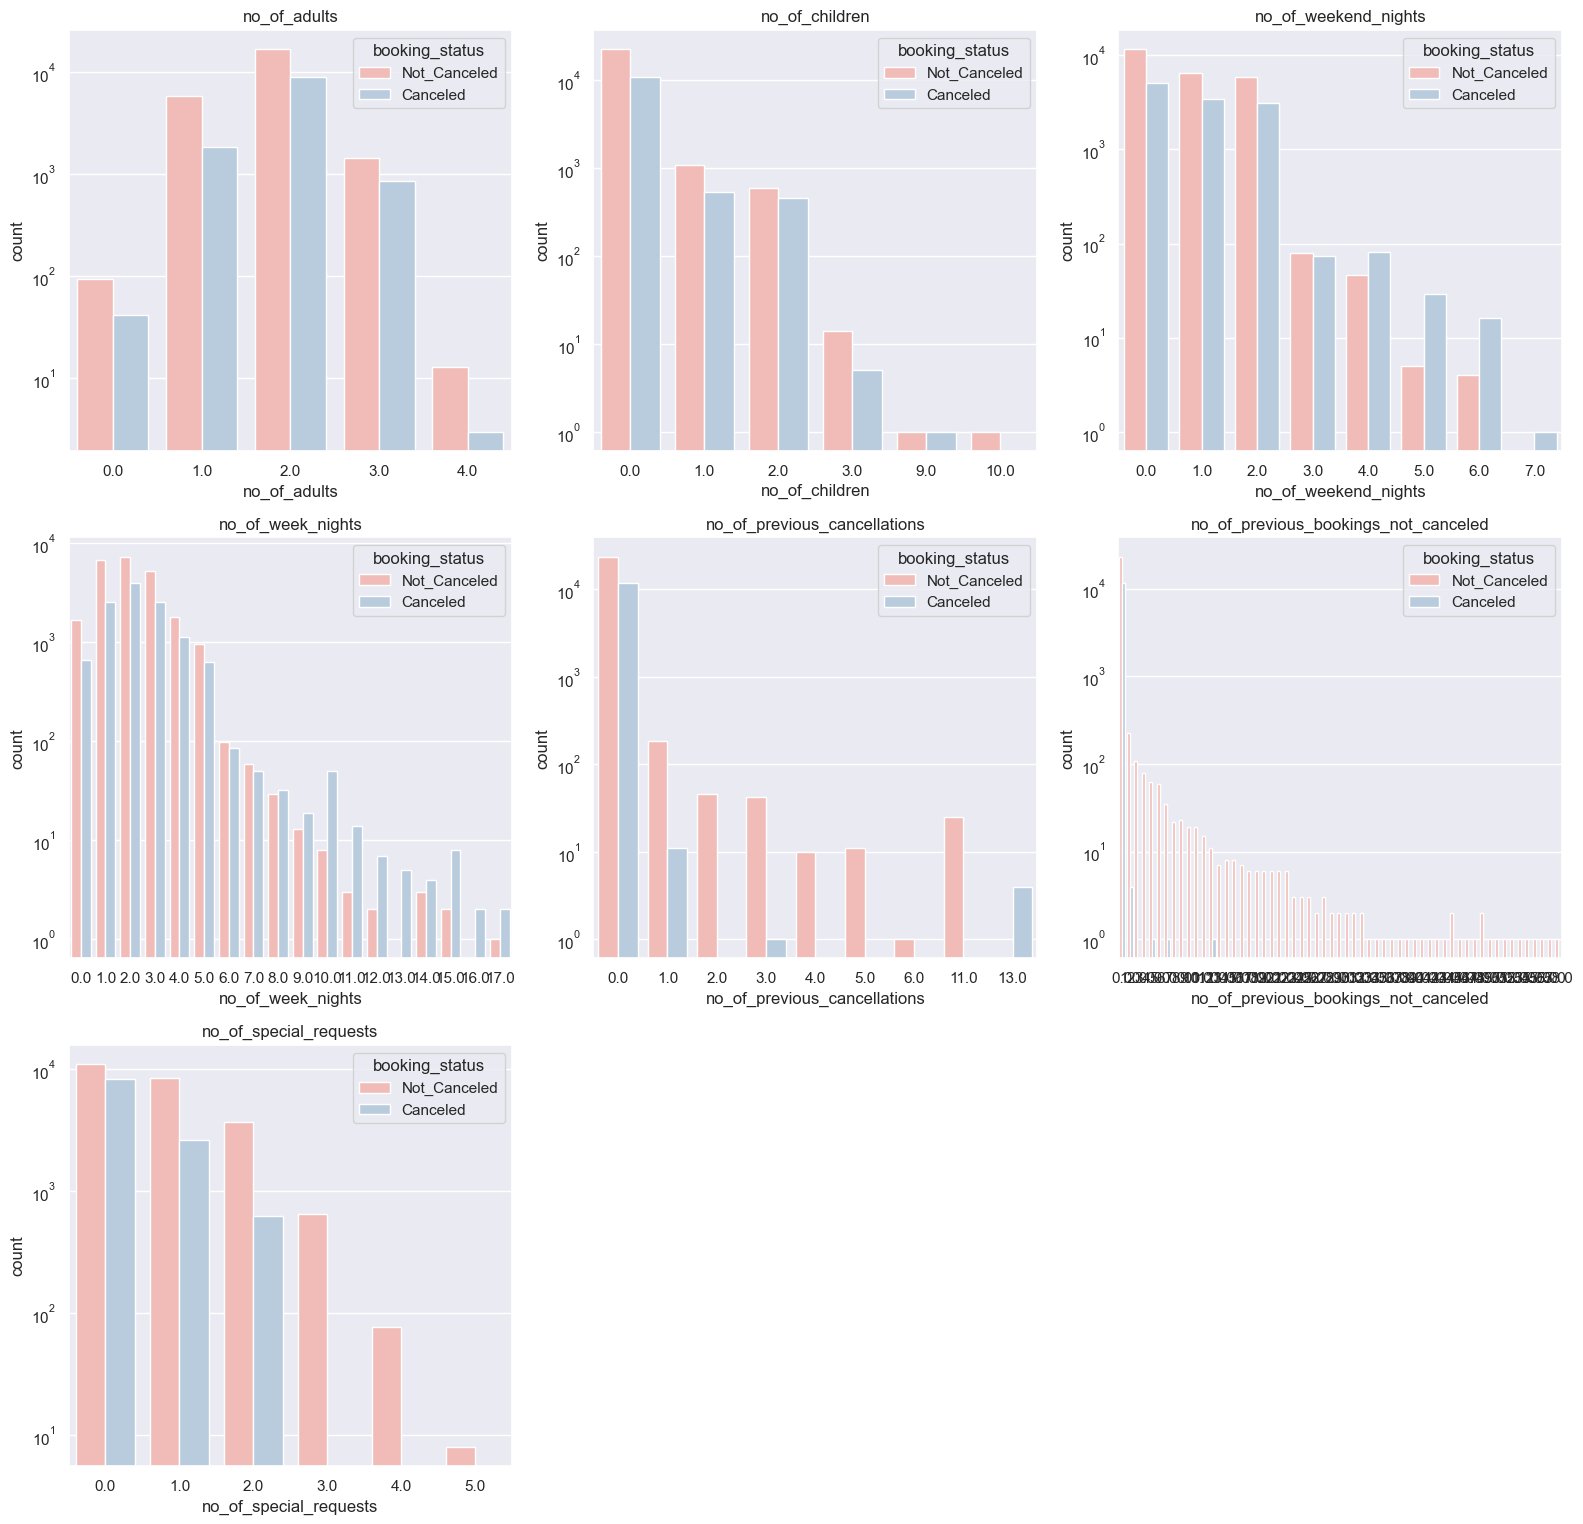

In [40]:
plt.figure(figsize = (16,20))

# Set the color map to "viridis"
# sns.set_palette("Accent")

for i, col in enumerate(cols_num):
    plt.subplot(4, 3, i+1)
    plt.gca().set_title(col)
    plt.gca().set_yscale('log')
    sns.countplot(data = df,
                  x = col,
                  palette ="Pastel1",
                  hue = 'booking_status' )
#     hist.set_label(col)
    
# plt.legend()
plt.tight_layout()                   # Adjust subplot spacing
plt.show;

<div style="background-color:  #eddcd2; padding: 10px;">  

### Categorical Variables
    
</div>


**Statistical summary**

In [14]:
# categorical columns
cols_cat = [col for col in df.columns if df[col].dtype == 'object']

df.describe(include='object').T

,count,unique,top,freq
type_of_meal_plan,35749,4,Meal Plan 1,27421
required_car_parking_space,33683.0,2.0,0.0,32649.0
room_type_reserved,35104,7,Room_Type 1,27234
market_segment_type,34763,5,Online,22264
repeated_guest,35689.0,2.0,0.0,34773.0
booking_status,36275,2,Not_Canceled,24390


In [ ]:
# for i,col in enumerate(cols_num):
#     plt.subplot(4,3,i+1)
#     plt.gca().set_title(col)
#     sns.countplot(x = col,
#                   palette = 'muted',
#                   data = df)
    
# plt.show